<a href="https://colab.research.google.com/github/Koo82/ML/blob/main/h_19_%E1%84%83%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%E1%84%8B%E1%85%AA%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중회귀와 다중분류

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - 출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - 출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

# 다중 회귀 예측

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 복수의 숫자로 구성된 경우

In [1]:
import scipy.stats
def gen_random_xy(n_steps=50, show=False):
    level = 0.5 + np.random.rand() # 0 ~ 1.5 사이의 임의의 크기 생성
    nd = scipy.stats.norm(3, 1) # 정규 분포 입력
    xs = np.linspace(0,6,n_steps)
    in_x = level*(nd.pdf(xs) + 0.02*np.random.rand(n_steps))
    out = np.cumsum(in_x) + 0.2*np.random.rand(n_steps)
    if show:
        print('random lebel=', level)
        plt.plot(in_x) ; plt.show()
        plt.plot(out); plt.show()
    return in_x, out

random lebel= 1.1686792803827841


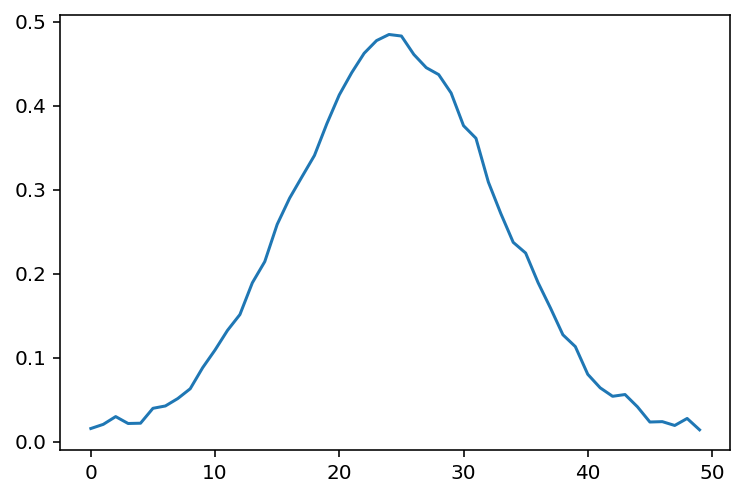

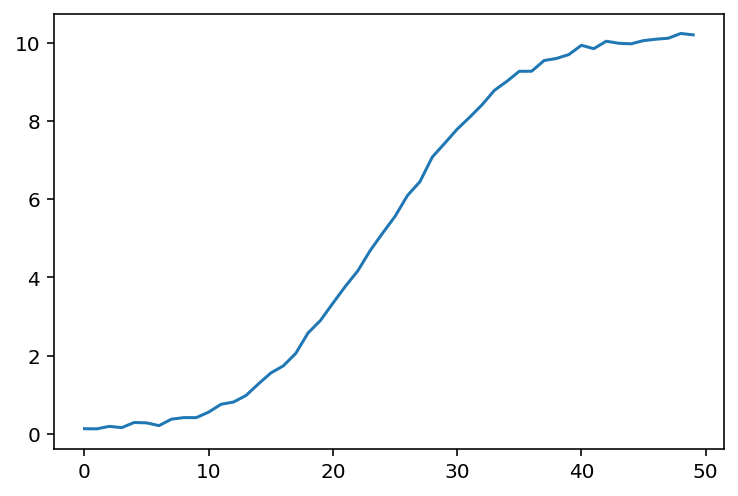

In [4]:
_= gen_random_xy(show=True)

In [5]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 샘플 수
n_steps = 50
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

In [6]:
X.shape, y.shape

((200, 50), (200, 50))

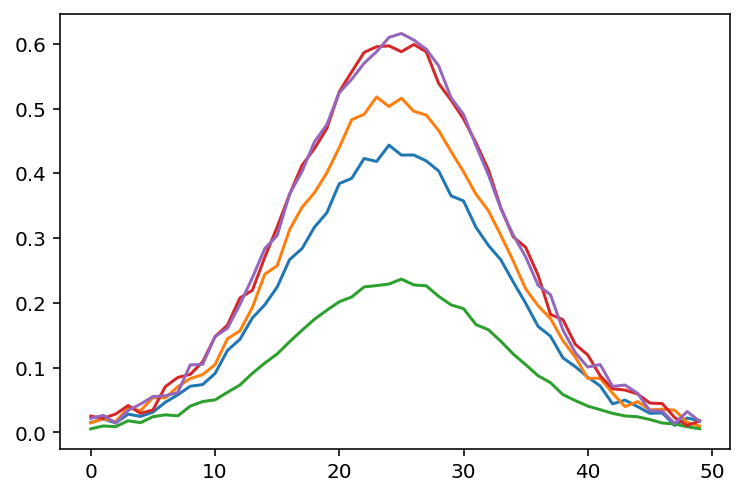

In [7]:
for i in range(5):
    plt.plot(X[i])

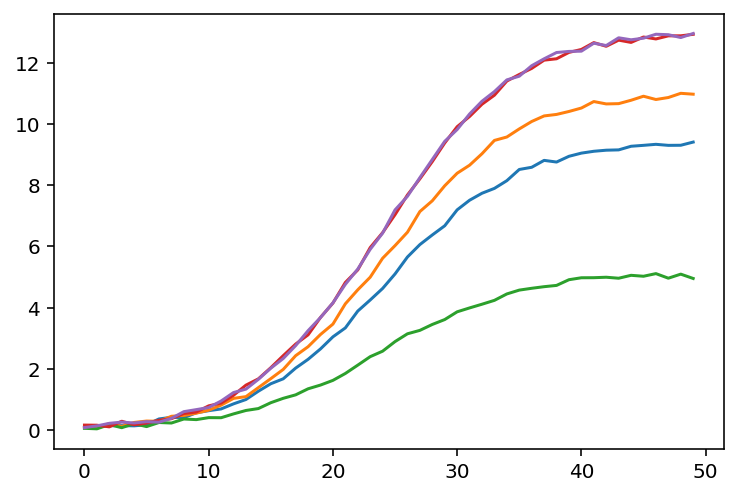

In [8]:
for i in range(5):
    plt.plot(y[i])

In [9]:
X.shape, y.shape

((200, 50), (200, 50))

In [10]:
X_all = X.copy()

### 모든 데이터 샘플을 사용한 다중회귀 예측

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9974113993069268

In [13]:
y_pred = rfr.predict(X_test)

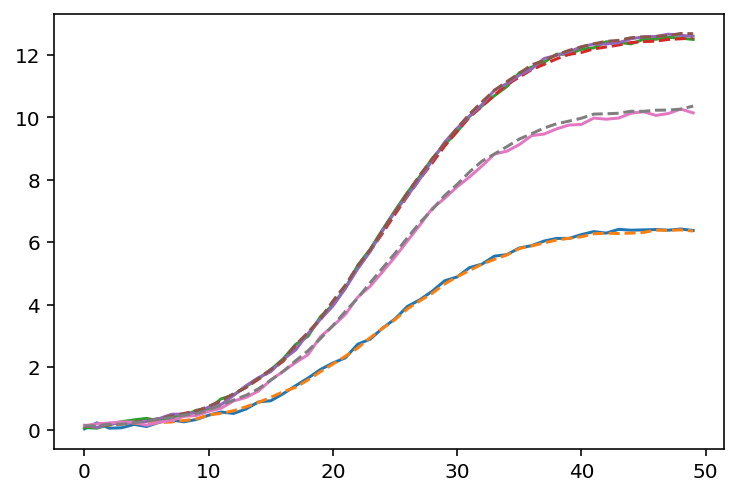

In [14]:
for i in range(4):
    plt.plot(y_test[i])
    plt.plot(y_pred[i], '--')

### 입력으로 50개가 아닌 일부 샘플만 사용하는 경우
-(참고) 랜덤포레스트는 인터폴레이션의 경우에 잘 맞고
 - MLP는 extrapolation의 경우에 잘 맞다
 - 아주 복잡하고 과거를 기억하는 요소가 많은 경우는 RNN(LSTM)을 사용한다
 -(추가) MLP를 이용하는 모델 작성


In [16]:
X.shape

(200, 50)

In [35]:
# 일부 샘플 수
n_interval = 2
xn = np.int((n_steps-40)/n_interval)
x_sample = [xn*(i+1)-1 for i in range(n_interval)]
x_sample

[4, 9]

In [36]:
# 해당 샘플 컬럼만으로 입력 재구성
X_part = X[:,x_sample]
print(X_part.shape)
X_part[:3]

(200, 2)


array([[0.02474021, 0.07388681],
       [0.03355115, 0.08919183],
       [0.01509618, 0.04769499]])

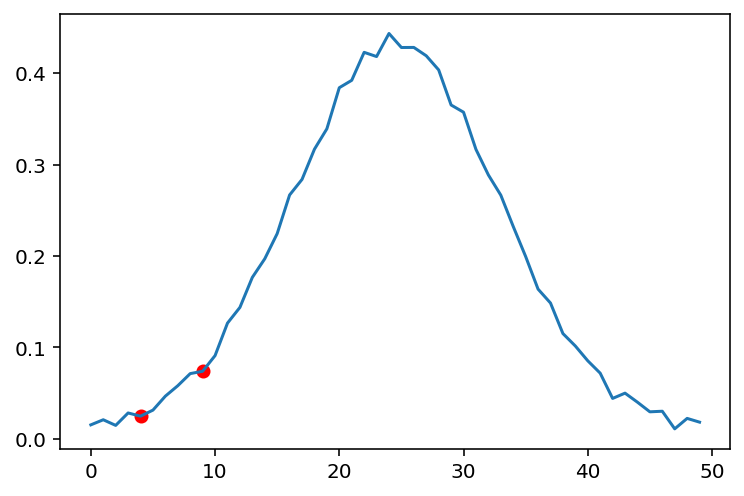

In [37]:
plt.plot(X[0])
plt.scatter(x_sample, X_part[0], c='r')

### 성능 비교

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)

In [40]:
X_train.shape, y_train.shape

((150, 2), (150, 50))

In [43]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (2,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                1650      
Total params: 4,306
Trainable params: 4,114
Non-trainable params: 192
__________________________________________________

In [53]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
record = model.fit(X_train, y_train, epochs=300, verbose=1)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

Epoch 1/300
5/5 [==============================] - 1s 2ms/step - loss: 33.3611
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 33.7865
Epoch 3/300
5/5 [==============================] - 0s 3ms/step - loss: 34.2698
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 33.0592
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 32.1858
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 33.7662
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 31.3862
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 32.6605
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 30.7776
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 30.9995
Epoch 11/300
5/5 [==============================] - 0s 3ms/step - loss: 30.4242
Epoch 12/300
5/5 [==============================] - 0s 3ms/step - loss: 31.5206
Epoch 13/300
5/5 [==============================]

0.6167566007515246

In [39]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9336727982622548

In [21]:
X_train.shape

(150, 10)

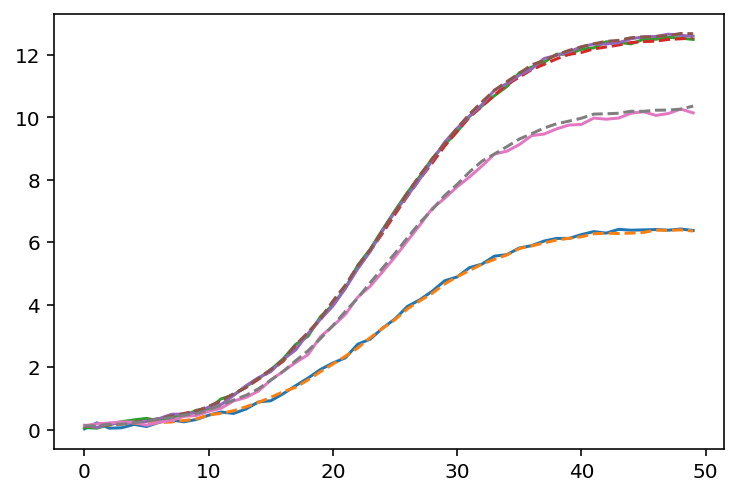

In [22]:
for i in range(4):
    plt.plot(y_test[i])
    plt.plot(y_pred[i], '--')

In [23]:
X_test.shape

(50, 10)

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - y_multi = np.c_[y1, y2] 또는
 - y_multi = np.stack((y1,y2)).T 사용
 
## kNN, 결정트리, 랜덤 포레스트가 지원
- 다항 로지스틱스를 사용하는 경우
 - model = LogisticRegression(multi_class=“multinomial”, solver = “lbgfs”, C=10)